In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data = pd.read_csv('/content/drive/My Drive/pydata/countries.csv')

In [96]:
data.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [97]:
# Compare the population growth in the US and China and World (World population is not provided in Data)
us = data[data.country == 'United States']
china = data[data.country == 'China']

In [98]:
#check US data
us.head()

,country,year,population
1608,United States,1952,157553000
1609,United States,1957,171984000
1610,United States,1962,186538000
1611,United States,1967,198712000
1612,United States,1972,209896000


In [99]:
#check China data
china.head()

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000


In [100]:
#add world total population
data['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [119]:
world = data.groupby('year')[['population']].sum()
world['country'] = 'World'

In [120]:
world

,population,country
year,,
1952,2406957150,World
1957,2664404580,World
1962,2899782974,World
1967,3217478384,World
1972,3576977158,World
1977,3930045807,World
1982,4289436840,World
1987,4691477418,World
1992,5110710260,World


In [122]:
world.reset_index(inplace=True)

In [123]:
world

,year,population,country
0,1952,2406957150,World
1,1957,2664404580,World
2,1962,2899782974,World
3,1967,3217478384,World
4,1972,3576977158,World
5,1977,3930045807,World
6,1982,4289436840,World
7,1987,4691477418,World
8,1992,5110710260,World
9,1997,5515204472,World


In [127]:
#add world population to data
data.append(world,ignore_index=True,sort=False)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1711,World,1987,4691477418
1712,World,1992,5110710260
1713,World,1997,5515204472
1714,World,2002,5886977579


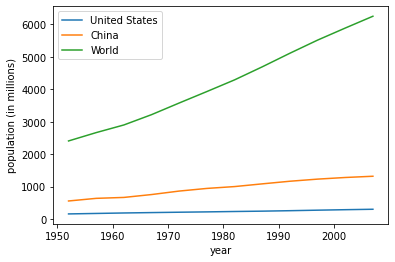

In [128]:
plt.plot(us.year, us.population / 10**6, label = 'United States')
plt.plot(china.year, china.population / 10**6, label = 'China')
plt.plot(world.year, world.population / 10**6, label = 'World')

plt.xlabel('year')
plt.ylabel('population (in millions)')

plt.legend()
plt.show()